<a href="https://colab.research.google.com/github/datdinhstore99/abc/blob/master/Datndchuviettay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

link = "https://storage.googleapis.com/kaggle-data-sets/9726/17999/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1590636274&Signature=mmFnDEeWdWTTaDW6wGzS77jKkfJC32YMLZOfgoDnTk0uKRmKjcrsZtipbcWzIYXZTXY5u1yJvLZG%2BYf1FVTrNjR4WHroWlQkyoUlcCXtj0j7RncsxmOOrGiPalJYuaQDEPilMEhvGhcVhgELBEMjmDQ9zY%2FLLIv9hqsyVjDr%2Blk4k%2Bs7Lo%2BqSuwAK%2FLuim4fHT5LNrwUcmIpGujjmoUUBhRrLFOiKJMmmgrffmsPjP9Y0Kd42nlX%2FB%2FSwYyA9g8w3Ws5zWgoojZHZqWN2hDhPkinFs590obwcdkV4DzPD%2BTOEZEQtuCa%2BHTRYDjlRC%2BIOl3hdE%2FvLDTm6emhjcE0gg%3D%3D&response-content-disposition=attachment%3B+filename%3Daz-handwritten-alphabets-in-csv-format.zip"


In [5]:
!pip install wget
import wget
wget.download(link)


'az-handwritten-alphabets-in-csv-format.zip'

In [0]:
data ="./" 
!unzip -q az-handwritten-alphabets-in-csv-format.zip -d $data

In [7]:
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential

from keras.utils import np_utils
import keras
from keras.models import Model
from keras.models import Sequential,Model
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense

Using TensorFlow backend.


Xử lý dữ liệu 

In [0]:
train_link = data + "A_Z Handwritten Data.csv"
import pickle
with open(train_link, mode="r") as csv_file:
    result = csv.reader(csv_file)
    rows = []
    
    # đọc từng dòng của file và thêm vào list rows, mỗi phần tử của list là một dòng
    for row in result:
        rows.append(row)

In [9]:
#xem dữ liệu của chúng ta
print(rows[1000])
print(np.shape(rows[1000]))

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '222', '184', '151', '64', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '95', '255', '255', '107', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '42', '255', '255', '210', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'

Mỗi dòng đại diện cho một ảnh có kích thước 28*28 
A là class 0
B là class 1
C là class 2
D là class 3
E là class 4
...
Z là class 26

['6', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '62', '189', '255', '255', '128', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '58', '182', '251', '255', '255', '255', '251', '0', '0', '0', '0

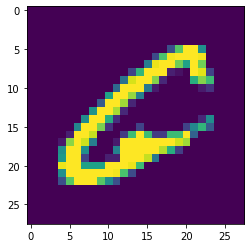

In [12]:
letter = rows[70000]
x = np.array([int(j) for j in letter[1:]])
x = x.reshape(28,28)

print(letter)
plt.imshow(x)
print(x)

# G là class 6

Lấy các kỳ tự A,B,C,D,E,F,G có trong tập dữ liệu của mình và lưu vào train_data và train_label
Mỗi phần tử trong train_label là một mảng 28x28 đại diện cho 1 ảnh của 1 ký tự .

In [0]:
train_data = [] # dữ liệu training
train_label = [] # label của chúng

for letter in rows :
  if letter[0] == '0' or (letter[0] == '1') or (letter[0] == '2') or (letter[0] == '3') or (letter[0] == '4') or (letter[0] == '5') or (letter[0] == '6'):
      x = np.array([int(j) for j in letter[1:]])
      train_data.append(x)
      train_label.append(int(letter[0]))
  else:
      break

In [16]:
#tong so anh cua 7 ký tự trên
print(len(train_label))


print(train_label)





74446
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Để dữ liệu là hoàn toàn ngẫu nhiên, không theo thứ tự xác định , chúng ta sẽ xáo trộn dữ liệu ban đầu

In [0]:
import random

shuffle_order = list(range(74446))
random.shuffle(shuffle_order)

train_data = np.array(train_data)
train_label = np.array(train_label)

train_data = train_data[shuffle_order]
train_label = train_label[shuffle_order]

Chia tập dữ liệu của mình thành 3 tập riêng biệt: training set, test set và validation set 

In [19]:
print(train_data.shape)
train_x = train_data[:67000]
train_y = train_label[:67000]

val_x = train_data[67000:74000]
val_y = train_label[67000:74000]

test_x = train_data[74000:]
test_y = train_label[74000:]

(74446, 784)


2


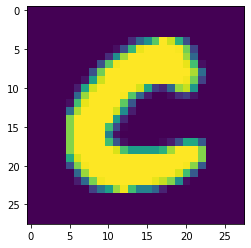

In [21]:
print(train_y[100])
x = train_x[100].reshape(28,28)
plt.imshow(x)


Để dữ liệu đầu vào được trùng khớp với mô hình đã xây dựng, chúng ta cần phải đưa dữ liệu về định dạng phù hợp như sau:

In [0]:
# reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
train_x = train_x.reshape(-1,28,28,1)/255.0
val_x = val_x.reshape(-1,28,28,1)/255.0
test_x = test_x.reshape(-1,28,28,1)/255.0

Đưa label về dạng onehot vector

In [0]:
train_y = keras.utils.to_categorical(train_y, 7)
val_y = keras.utils.to_categorical(val_y,7)
test_y = keras.utils.to_categorical(test_y, 7)

In [24]:
train_x.shape

(67000, 28, 28, 1)

Xây dựng mô hình

In [25]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flatten layer chuyển từ tensor sang vector 
model.add(Flatten())
# Thêm Fully Connected layer với 128 nodes và dùng hàm relu
model.add(Dense(128, activation='relu'))
# Output layer với 7 node và dùng softmax function để chuyển sang xác suất.
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức # đùng để tối ưu hàm loss function. 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [26]:
print("Start training")

H = model.fit(train_x,train_y, validation_data=(val_x, val_y),batch_size=32, epochs=10, verbose=1)

Start training
Train on 67000 samples, validate on 7000 samples
Epoch 1/10
67000/67000 [==============================] - 19s 285us/step - loss: 0.1290 - accuracy: 0.9590 - val_loss: 0.0344 - val_accuracy: 0.9883
Epoch 2/10
67000/67000 [==============================] - 12s 184us/step - loss: 0.0494 - accuracy: 0.9851 - val_loss: 0.0264 - val_accuracy: 0.9920
Epoch 3/10
67000/67000 [==============================] - 12s 184us/step - loss: 0.0366 - accuracy: 0.9889 - val_loss: 0.0156 - val_accuracy: 0.9957
Epoch 4/10
67000/67000 [==============================] - 12s 185us/step - loss: 0.0277 - accuracy: 0.9914 - val_loss: 0.0209 - val_accuracy: 0.9943
Epoch 5/10
67000/67000 [==============================] - 12s 185us/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0174 - val_accuracy: 0.9964
Epoch 6/10
67000/67000 [==============================] - 12s 184us/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.0085 - val_accuracy: 0.9984
Epoch 7/10
67000/67000 [==================

In [27]:
score = model.evaluate(test_x,test_y,verbose = 0)
print(score)

[0.0011105646782063575, 1.0]


Giá trị dự đoán:  2


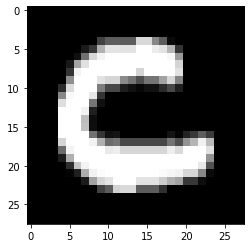

In [29]:
plt.imshow(test_x[25].reshape(28,28), cmap='gray')
y_predict = model.predict(test_x[25].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))

BÀI TOÁN K-MEANS CLUSTERING 

In [0]:
train_x1 = train_data[:67000]
train_y1 = train_label[:67000]

test_x1 = train_data[67000:]
test_y1 = train_label[67000:]

6


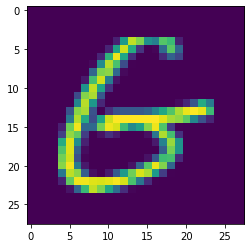

In [31]:
print(train_y1[5005])
x = train_x1[5005].reshape(28,28)
plt.imshow(x)



Để hiện thị nhiều bức ảnh các chữ số cùng một lúc, tôi có dùng thêm hàm display_network 

In [0]:
# This function visualizes filters in matrix A. Each column of A is a
# filter. We will reshape each column into a square image and visualizes
# on each cell of the visualization panel.
# All other parameters are optional, usually you do not need to worry
# about it.
# opt_normalize: whether we need to normalize the filter so that all of
# them can have similar contrast. Default value is true.
# opt_graycolor: whether we use gray as the heat map. Default is true.
# opt_colmajor: you can switch convention to row major for A. In that
# case, each row of A is a filter. Default value is false.
# source: https://github.com/tsaith/ufldl_tutorial

def display_network(A, m = -1, n = -1):
    opt_normalize = True
    opt_graycolor = True

    # Rescale
    A = A - np.average(A)

    # Compute rows & cols
    (row, col) = A.shape
    sz = int(np.ceil(np.sqrt(row)))
    buf = 1
    if m < 0 or n < 0:
        n = np.ceil(np.sqrt(col))
        m = np.ceil(col / n)
        

    image = np.ones(shape=(buf + m * (sz + buf), buf + n * (sz + buf)))

    if not opt_graycolor:
        image *= 0.1

    k = 0

    for i in range(int(m)):
        for j in range(int(n)):
            if k >= col:
                continue

            clim = np.max(np.abs(A[:, k]))
            if opt_normalize:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / clim
            else:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / np.max(np.abs(A))
            k += 1

    return image

def display_color_network(A):
    """
    # display receptive field(s) or basis vector(s) for image patches
    #
    # A         the basis, with patches as column vectors
    # In case the midpoint is not set at 0, we shift it dynamically
    :param A:
    :param file:
    :return:
    """
    if np.min(A) >= 0:
        A = A - np.mean(A)

    cols = np.round(np.sqrt(A.shape[1]))

    channel_size = A.shape[0] / 3
    dim = np.sqrt(channel_size)
    dimp = dim + 1
    rows = np.ceil(A.shape[1] / cols)
    B = A[0:channel_size, :]
    C = A[channel_size:2 * channel_size, :]
    D = A[2 * channel_size:3 * channel_size, :]

    B = B / np.max(np.abs(B))
    C = C / np.max(np.abs(C))
    D = D / np.max(np.abs(D))

    # Initialization of the image
    image = np.ones(shape=(dim * rows + rows - 1, dim * cols + cols - 1, 3))

    for i in range(int(rows)):
        for j in range(int(cols)):
            # This sets the patch
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 0] = B[:, i * cols + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 1] = C[:, i * cols + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 2] = D[:, i * cols + j].reshape(dim, dim)

    image = (image + 1) / 2

    #PIL.Image.fromarray(np.uint8(image * 255), 'RGB').save(filename)

    return image

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize



In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

In [0]:
X = train_x1
X0 = np.asarray(X)[:67000,:]/256.0
X = X0

K = 7

kmeans = KMeans(n_clusters=K).fit(X)

pred_label = kmeans.predict(X)

<class 'numpy.ndarray'>
(784, 7)


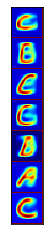

In [52]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)

f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig('a1.png', bbox_inches='tight')


# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())

# map the normalized data to colors
# image is now RGBA (512x512x4) 
image = cmap(norm(A))

import imageio
imageio.imwrite('aa.png', image)

In [53]:
print(type(pred_label))
print(pred_label.shape)
print(type(X0))


<class 'numpy.ndarray'>
(67000,)
<class 'numpy.ndarray'>


In [0]:
N0 = 20;
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X0[pred_label == k, :]

    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(N0).fit(Xk)
    dist, nearest_id  = neigh.kneighbors(center_k, N0)
    
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]


    

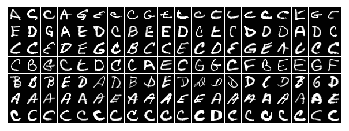

In [55]:
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()
